### 可视化分析

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [75]:
data=pd.read_csv('./数据处理后的数据.csv',encoding='GB18030')

#### 1.发布岗位需求前十

In [76]:
# 统计各岗位的数量并绘制数量前10的岗位柱状图
x=data['工作岗位'].value_counts().sort_values(ascending=False)[:10].index
y=data['工作岗位'].value_counts().sort_values(ascending=False)[:10].values

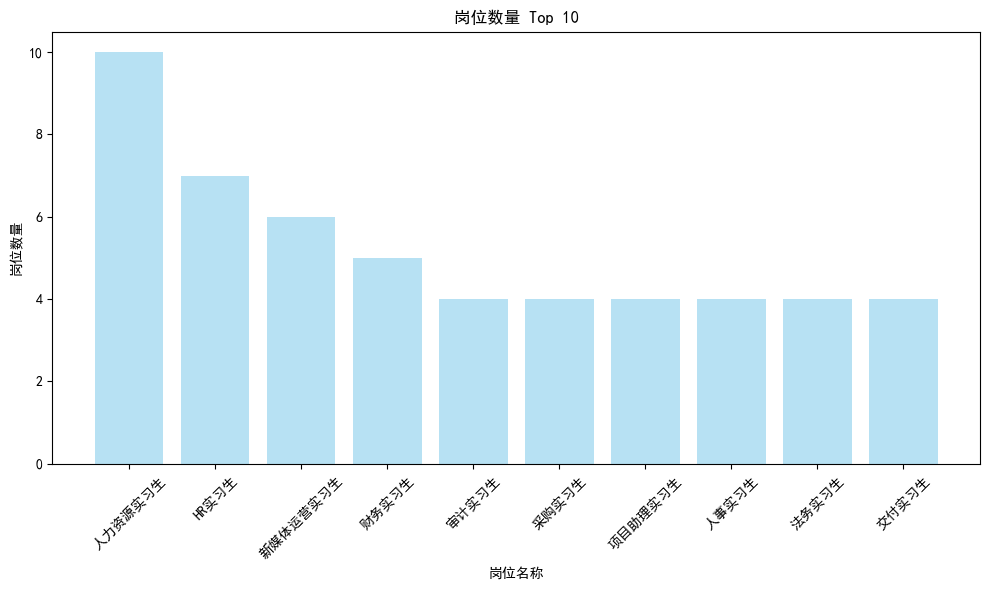

In [77]:
# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.bar(x, y, alpha=0.6, color='skyblue') 
plt.title('岗位数量 Top 10')
plt.xlabel('岗位名称')
plt.ylabel('岗位数量')

plt.xticks(rotation=45)

plt.tight_layout()  # 自动调整布局
plt.show()

#### 2.学历要求与薪资待遇的关系

In [78]:
data.columns

Index(['工作岗位', '薪资待遇', '实习时长', '工作描述', '学历要求', '招聘人数', '发布时间', '公司名称', '公司地址',
       '企业领域', '公司规模', '年份', '省份'],
      dtype='object')

In [79]:
# 统计不同学历要求的招聘数量和薪资平均值，并绘制学历要求与薪资水平折线图和学历要求与招聘数量柱状图的组合图
data1=data.groupby('学历要求').agg({'薪资待遇': 'mean', '招聘人数': 'sum'})
data1

,薪资待遇,招聘人数
学历要求,,
不限,135.655172,4310
大专,176.813559,1158
本科,183.024845,1158
硕士,164.000000,45
高中,279.500000,80


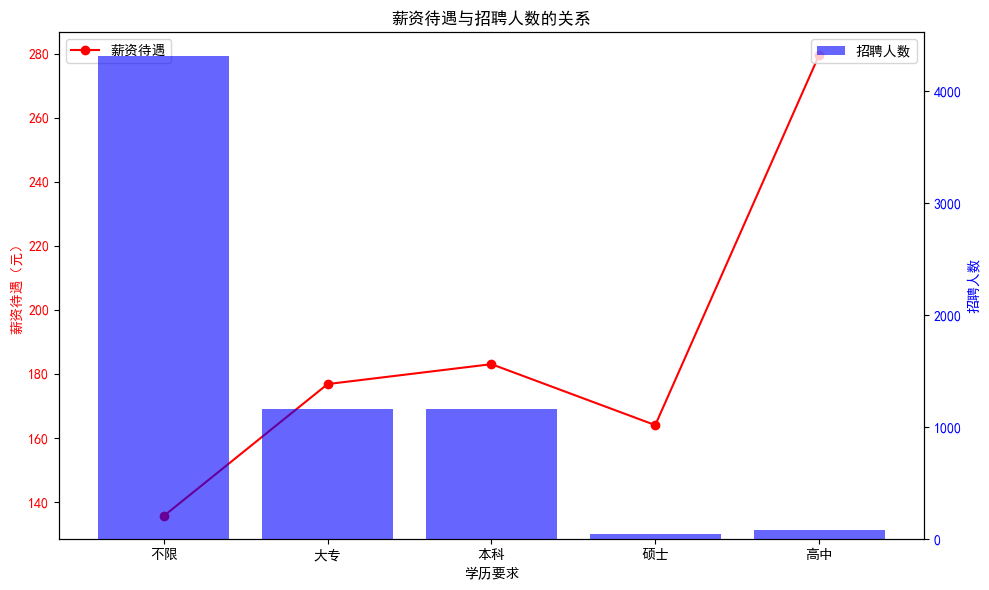

In [80]:
x = data1.index
y1 = data1['薪资待遇']
y2 = data1['招聘人数']

# 创建图形和坐标轴
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制薪资待遇的折线图
ax1.set_xlabel('学历要求')
ax1.set_ylabel('薪资待遇（元）', color='red')
ax1.plot(x, y1, color='red', marker='o', label='薪资待遇')
ax1.tick_params(axis='y', labelcolor='red')

# 创建第二个坐标轴，绘制招聘人数的柱状图
ax2 = ax1.twinx()  
ax2.set_ylabel('招聘人数', color='blue')
ax2.bar(x, y2, color='blue', alpha=0.6, label='招聘人数')
ax2.tick_params(axis='y', labelcolor='blue')

# 添加标题和图例
plt.title('薪资待遇与招聘人数的关系')
fig.tight_layout()  # 自动调整布局
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 显示图形
plt.show()

#### 3.2024年发布招聘数量的趋势

In [81]:
data2=data.groupby('发布时间')[['招聘人数']].sum()

In [82]:
# 统计2024年每天发布的招聘数量，并绘制折线图
days=data2.index
numbers=data2.values

Text(0, 0.5, '招聘数量')

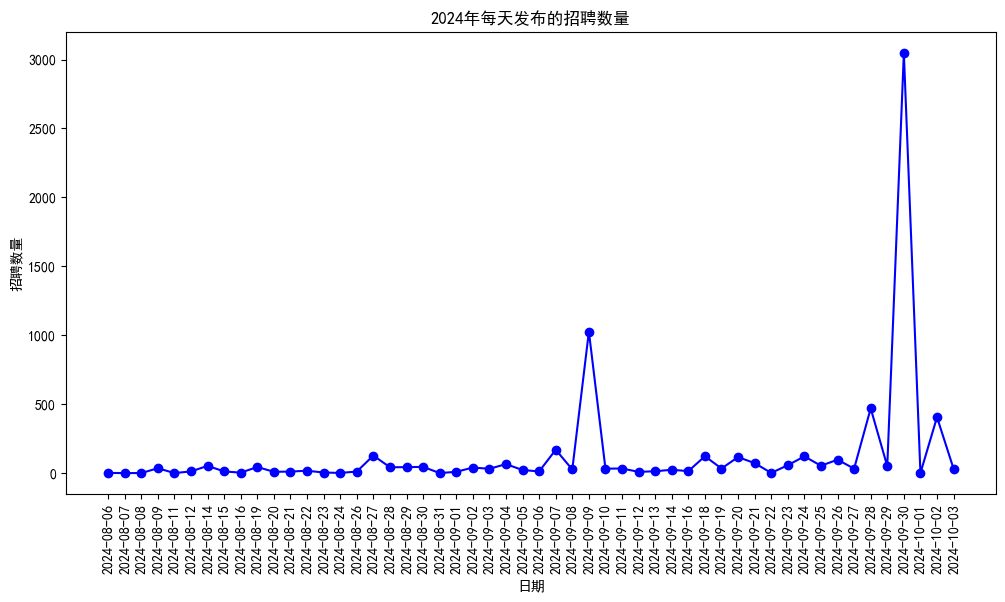

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(days, numbers, marker='o', color='blue')

# 设置图表标题和标签
plt.title('2024年每天发布的招聘数量')
plt.xticks(rotation=90)
plt.xlabel('日期')
plt.ylabel('招聘数量')

#### 4.实习时长要求占比

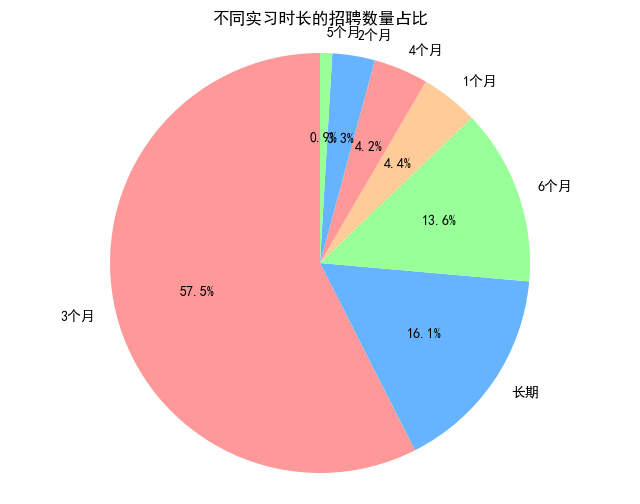

In [84]:
# 统计不同实习的招聘数量并绘制占比饼图
internship_counts=data['实习时长'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(internship_counts, labels=internship_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

plt.title('不同实习时长的招聘数量占比')
# 保证饼图是圆的
plt.axis('equal')
plt.show()

#### 5.各省份人才需求情况

In [85]:
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts

In [86]:
# 统计各省份的人才需求数量并绘制区域地图热力图
# 按省份统计招聘人数总和
province_counts = data.groupby('省份')[['招聘人数']].sum().reset_index()

# 获取省份名称和对应的招聘人数
provinces = province_counts['省份'].tolist()
recruit_numbers = province_counts['招聘人数'].tolist()

# 绘制区域地图热力图
map_chart = (
    Map()
    .add("人才需求", [list(z) for z in zip(provinces, recruit_numbers)], "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各省份人才需求数量热力图"),
        visualmap_opts=opts.VisualMapOpts(max_=max(recruit_numbers), is_piecewise=True),
    )
)

# 渲染并展示
map_chart.render_notebook()  # 如果在 Jupyter 中运行，请使用此行代码

##### 6.各省份各行业的薪资水平情况

In [87]:
data.columns

Index(['工作岗位', '薪资待遇', '实习时长', '工作描述', '学历要求', '招聘人数', '发布时间', '公司名称', '公司地址',
       '企业领域', '公司规模', '年份', '省份'],
      dtype='object')

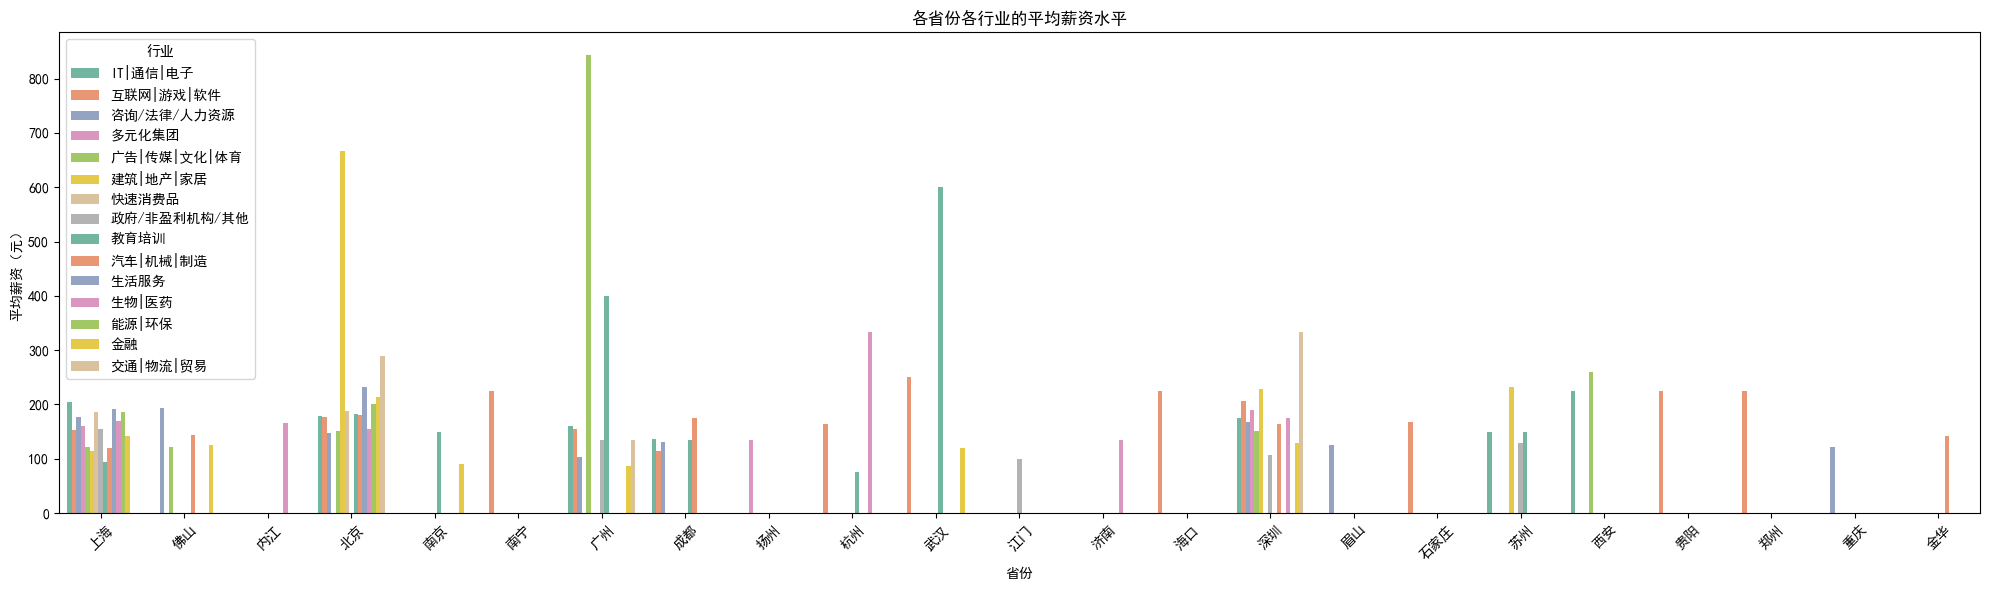

In [88]:
# 统计各省份各行业的薪资水平情况并绘制柱形图
province_industry_salary=data.groupby(['省份','企业领域'])['薪资待遇'].mean().reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(x='省份', y='薪资待遇',hue='企业领域', data=province_industry_salary, palette="Set2")

# 设置图表标题和标签
plt.title('各省份各行业的平均薪资水平')
plt.xlabel('省份')
plt.ylabel('平均薪资（元）')
plt.xticks(rotation=45)

# 显示图例
plt.legend(title='行业')

plt.tight_layout()
plt.show()

##### 7.各公司的薪资水平和人才需求量

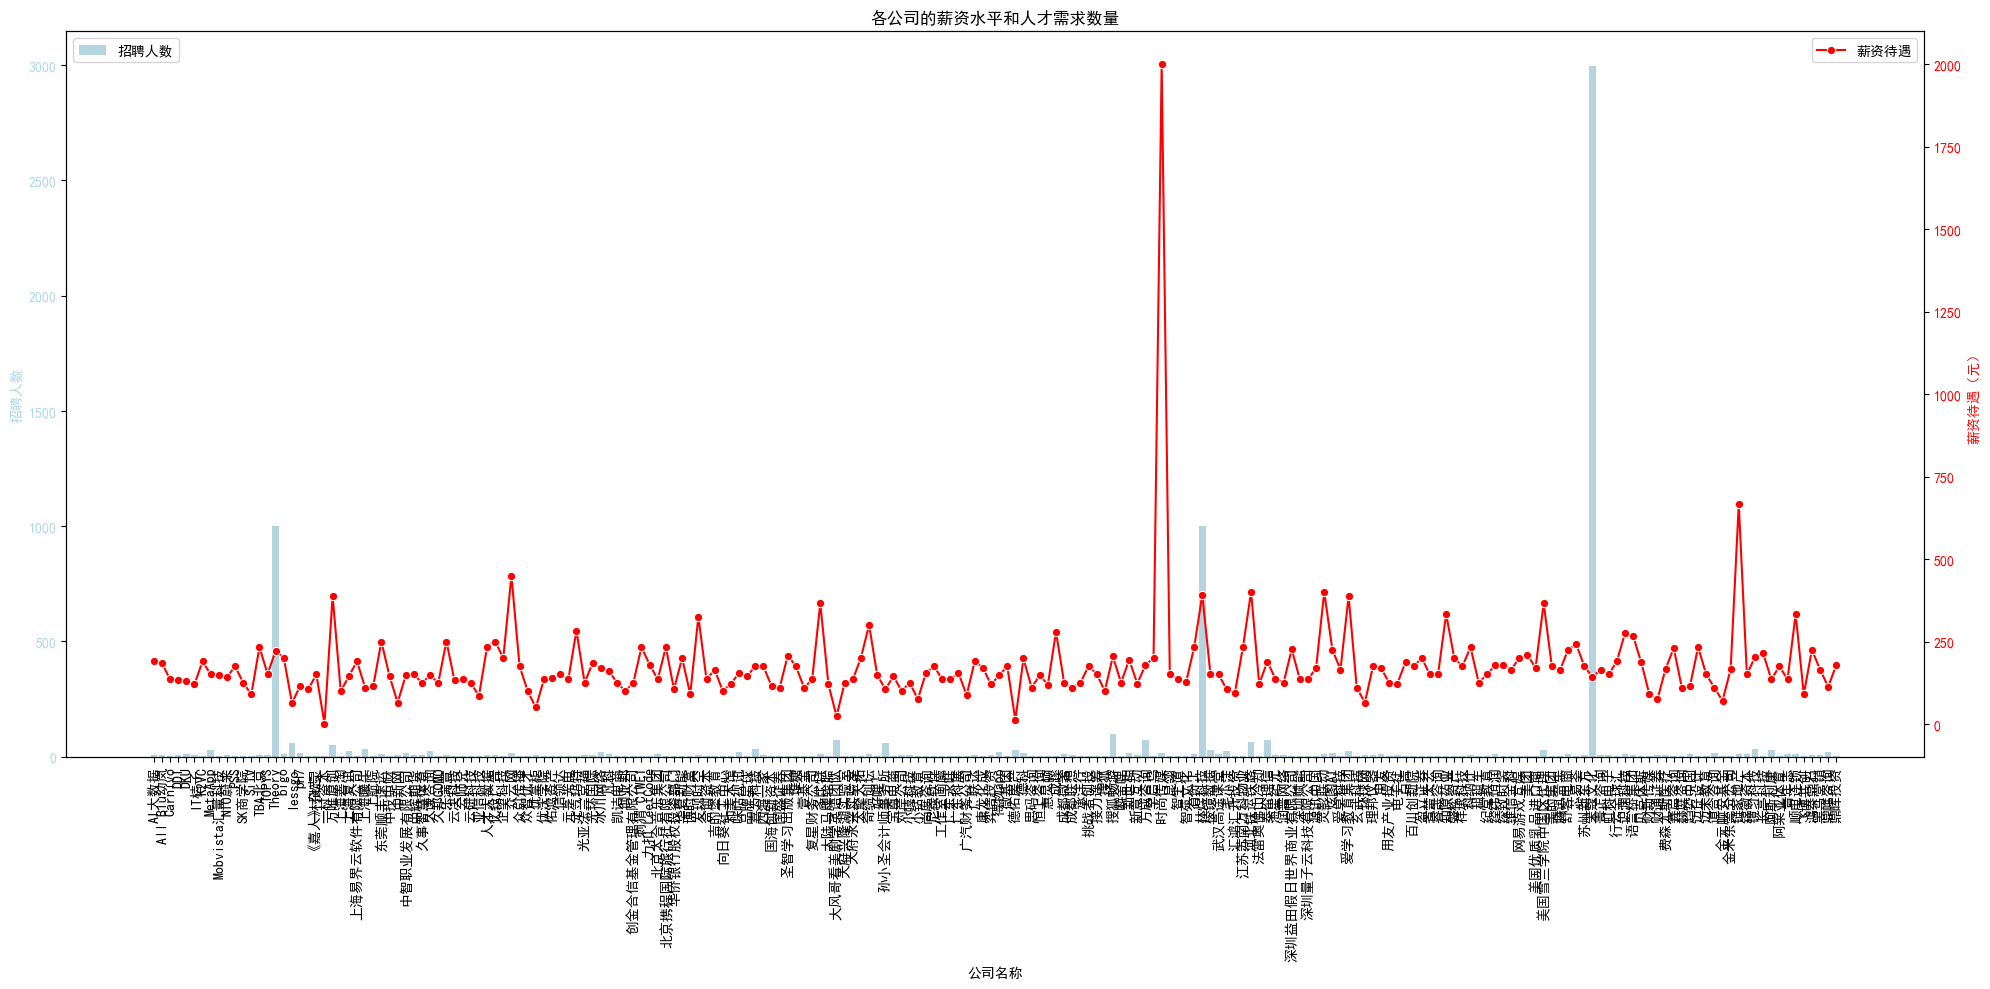

In [89]:
# 统计各公司的薪资水平和人才需求数量并柱状图和折线图的组合图
company_stats = data.groupby('公司名称').agg(薪资待遇=('薪资待遇', 'mean'), 招聘人数=('招聘人数', 'sum')).reset_index()

fig, ax1 = plt.subplots(figsize=(20, 10))
# 绘制柱状图（招聘人数）
sns.barplot(x='公司名称', y='招聘人数', data=company_stats, ax=ax1, color='lightblue', label='招聘人数')
ax1.set_ylabel('招聘人数', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')

# 创建第二个 Y 轴
ax2 = ax1.twinx()
sns.lineplot(x='公司名称', y='薪资待遇', data=company_stats, ax=ax2, color='red', marker='o', label='薪资待遇')
ax2.set_ylabel('薪资待遇（元）', color='red')
ax2.tick_params(axis='y', labelcolor='red')


# 设置标题和标签
plt.title('各公司的薪资水平和人才需求数量')
ax1.set_xlabel('公司名称')
ax1.set_xticklabels(company_stats['公司名称'], rotation=90, ha='center')  # 使用 ax1.set_xticklabels()

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [90]:
data.columns

Index(['工作岗位', '薪资待遇', '实习时长', '工作描述', '学历要求', '招聘人数', '发布时间', '公司名称', '公司地址',
       '企业领域', '公司规模', '年份', '省份'],
      dtype='object')

##### 8.公司规模占比情况

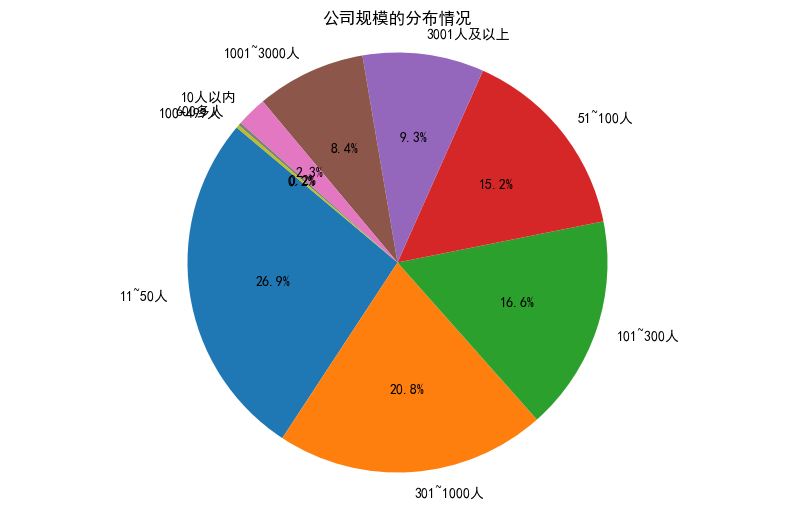

In [91]:
# 统计公司规模的数量并绘制饼图
size_counts=data['公司规模'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(size_counts,labels=size_counts.index,autopct='%1.1f%%', startangle=140)
plt.title('公司规模的分布情况')
plt.axis('equal')  # 确保饼图是圆形
plt.show()

##### 9.公司规模预人才需求量和薪资水平的关系

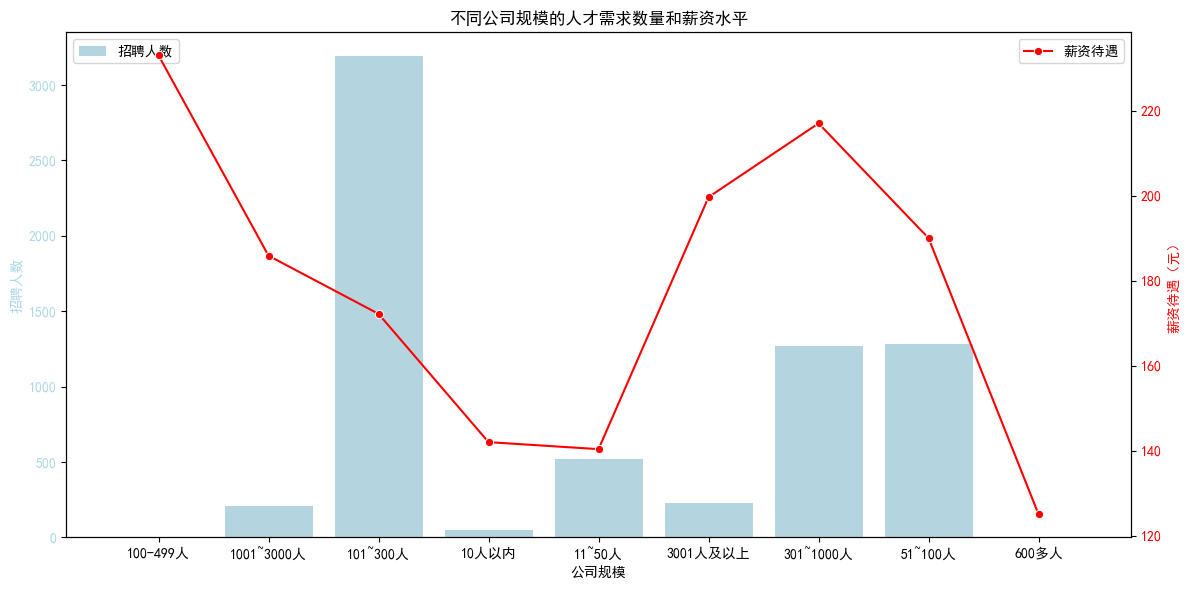

In [92]:
# 统计不同公司规模的人才需求数量和薪资水平

company_size_stats = data.groupby('公司规模').agg(
    薪资待遇=('薪资待遇', 'mean'),
    招聘人数=('招聘人数', 'sum')
).reset_index()


plt.figure(figsize=(12, 6))

# 创建双 Y 轴图
ax1 = plt.subplot(111)

# 绘制招聘人数的柱状图
sns.barplot(x='公司规模', y='招聘人数', data=company_size_stats, ax=ax1, color='lightblue', label='招聘人数')
ax1.set_ylabel('招聘人数', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')

# 创建第二个 Y 轴
ax2 = ax1.twinx()

# 绘制薪资待遇的折线图
sns.lineplot(x='公司规模', y='薪资待遇', data=company_size_stats, ax=ax2, color='red', marker='o', label='薪资待遇')
ax2.set_ylabel('薪资待遇（元）', color='red')
ax2.tick_params(axis='y', labelcolor='red')


plt.title('不同公司规模的人才需求数量和薪资水平')
ax1.set_xlabel('公司规模')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()

plt.show()

##### 10. 各行业的人才需求量

In [93]:
data.columns

Index(['工作岗位', '薪资待遇', '实习时长', '工作描述', '学历要求', '招聘人数', '发布时间', '公司名称', '公司地址',
       '企业领域', '公司规模', '年份', '省份'],
      dtype='object')

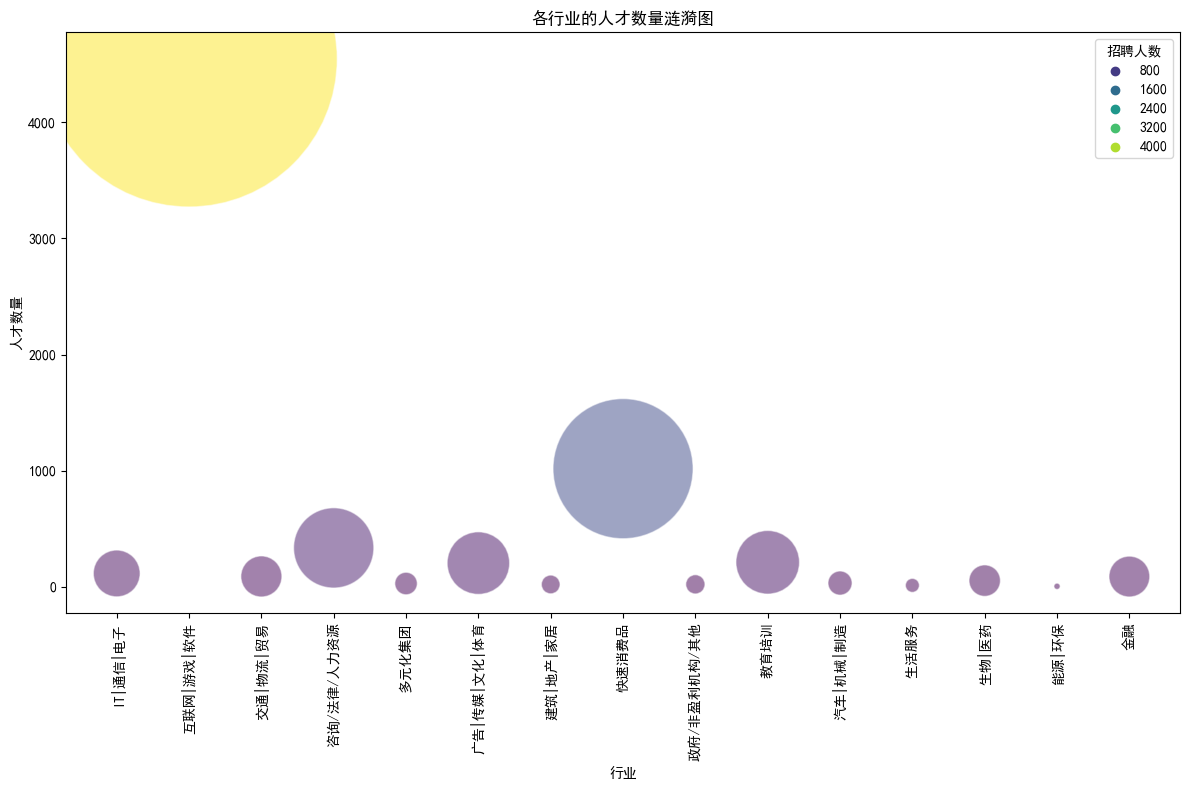

In [94]:
# 统计各行业的人才数量并绘制涟漪图(气泡图)
# 统计各行业的人才数量
industry_counts = data.groupby('企业领域')['招聘人数'].sum().reset_index()

# 设置气泡的大小，这里使用每个行业的招聘人数作为气泡大小
sizes = industry_counts['招聘人数'] * 10  # 将招聘人数放大用于气泡图的大小

# 绘制涟漪图（气泡图）
plt.figure(figsize=(12, 8))
sns.scatterplot(data=industry_counts, x='企业领域', y='招聘人数', s=sizes, alpha=0.5, hue='招聘人数', palette='viridis')

plt.title('各行业的人才数量涟漪图')
plt.xlabel('行业')
plt.ylabel('人才数量')
plt.legend(title='招聘人数')

plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

##### 11.工作描述词云图

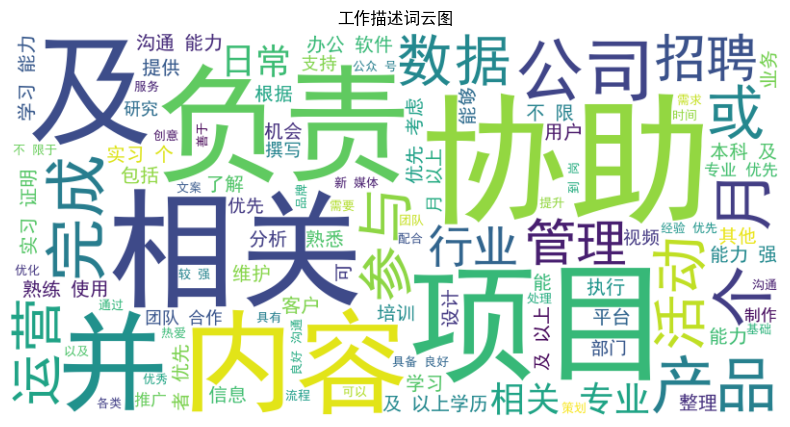

In [95]:
# 导入wordcloud库，统计工作描述的词频，并绘制词云图
from wordcloud import WordCloud

# 将工作描述合并成一个字符串
text = ' '.join(data['工作描述'])  # 这里合并成一个字符串

# 创建词云对象
wordcloud = WordCloud(
    font_path='simhei.ttf',  # 需提供中文字体路径，如 simhei.ttf
    width=800,
    height=400,
    background_color='white',
    max_words=100
).generate(text)

# 绘制词云图
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 关闭坐标轴
plt.title('工作描述词云图')
plt.show()